<a href="https://colab.research.google.com/github/manoj1995madushanka/couseraTensorflow/blob/master/Horse_or_Human_NoValidation_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2019-05-23 04:44:12--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.31.144, 2404:6800:4004:80a::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.31.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  46.7MB/s    in 3.1s    

2019-05-23 04:44:21 (46.7 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



the following python code will use the OS library to use operating system libraries, giving you access to the file system, and the zipfile library allowing you to unzip the data

In [0]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip' #file path
zip_ref = zipfile.ZipFile(local_zip,'r') #open for read
zip_ref.extractall('/tmp/hourse-or-human') #unzip 
zip_ref.close()

the contents of the .zip are extracted to the bas e directory /tmp/horse-or-human, which in turn each contain horsesand humans subdirectories.

In short The training set is the data that is used to tell the neural network model that this is what a horse looks ike this is what a human looks like etc.

One thing to pay attention to in this sample: We do not explicitly label the images as horses or humans. If you remember with the handwriting example earlier, we had labelled 'this is a 1', 'this is a 7' etc. Later you'll see something called an ImageGenerator being used -- and this is coded to read images from subdirectories, and automatically label them from the name of that subdirectory. So, for example, you will have a 'training' directory containing a 'horses' directory and a 'humans' one. ImageGenerator will label the images appropriately for you, reducing a coding step.

Let's define each of these directories:


In [0]:
#directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/hourse-or-human/horses')

#directory with our training human pictures
train_human_dir = os.path.join('/tmp/hourse-or-human/humans')

now let's see what the filenames look like in the horses and humans training directories

In [4]:
train_horse_names = os.listdir(train_horse_dir) #get filenames
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse29-9.png', 'horse15-9.png', 'horse05-0.png', 'horse30-0.png', 'horse35-4.png', 'horse02-3.png', 'horse31-8.png', 'horse09-5.png', 'horse03-9.png', 'horse37-2.png']
['human13-16.png', 'human08-24.png', 'human14-00.png', 'human16-16.png', 'human06-27.png', 'human04-17.png', 'human03-18.png', 'human16-00.png', 'human16-17.png', 'human09-24.png']


let's find out total number of hourse and human images in the directories

In [5]:
print('total training horse images : ',len(os.listdir(train_horse_dir)))

print('total training human images : ',len(os.listdir(train_human_dir)))

total training horse images :  500
total training human images :  527


now let's take a lookat a few pictures to get a better sense of what they look like, first configure the matplot parameters:

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# parameters for our graph; we will output images in a 4*4 configuration
nrows = 4
ncols = 4

#index for iterating over images
pic_index = 0


now display a batch of 8 horse and 8 human pictures. you can rerun the cellto see a fresh batch each time

<function matplotlib.pyplot.show>

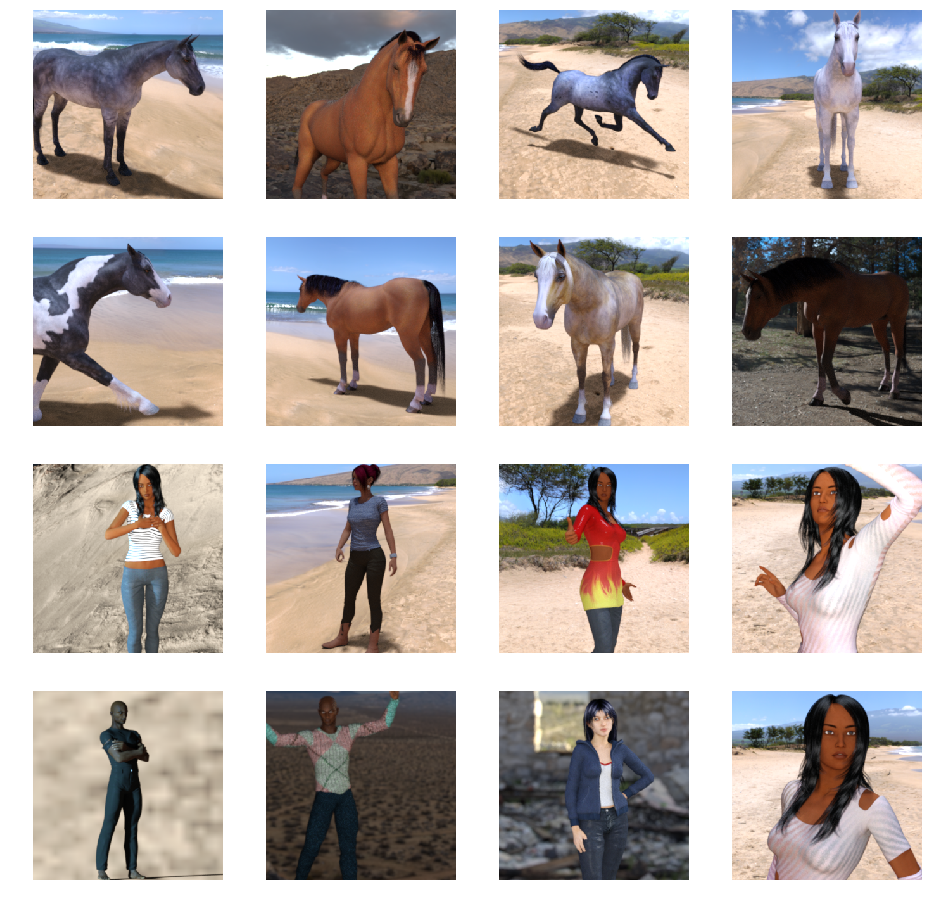

In [7]:
# set upmatplotlib fig, and size it to fit 4*4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index +=8
next_horse_pix = [os.path.join(train_horse_dir,fname)
                 for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir,fname)
                 for fname in train_human_names[pic_index-8:pic_index]]

for i,img_path in enumerate(next_horse_pix + next_human_pix):
  # set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('off') #do not show axes
  
  img = mpimg.imread(img_path)
  plt.imshow(img)
  
  
plt.show


**buiding a small model from scratch**
before we continue let's start defining the model

we add convolutionl layers as in the previous example,and flatten the final result to feedinto th densely connected layers,
finally we add the densely connected layers.
note that because we are facing a two-class classification problem

ie: a binary classification problem, we will end our network with a sigmoid activation, so that he ouput of our network will be a single scaler between 0 and 1, encoding the probability that the current image is class 1

In [8]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # only 1 output neuron, Itwill contain a value from 0-1 where 0 for horses and 1for human
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

Instructions for updating:
Colocations handled automatically by placer.


let's look at summery

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        36928     
__________

the output shape column shows the size of your feature map evolves in each successive layer. the convolutional layers reduse the size of the feature maps by a bit due to padding and each pooling layer halves the dimensions.

next,we will configure the specifications for model training. we will train our model with the "binary_crossentropy" loss, because it is a binary classification problem and our final activation is a sigmoid.
we will use the rmsprop optimizer with a earning rateof 0.001 during training, we will want to monitor classification accuracy.


NOTE: In this case, using the [RMSprop optimization algorithm](https://wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp) is preferable to [stochastic gradient descent](https://developers.google.com/machine-learning/glossary/#SGD) (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as [Adam](https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam) and [Adagrad](https://developers.google.com/machine-learning/glossary/#AdaGrad), also automatically adapt the learning rate during training, and would work equally well here.)

For a refresher on loss metrics, see the Machine Learning [Crash Course: ](https://developers.google.com/machine-learning/crash-course/descending-into-ml/video-lecture)

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', optimizer = RMSprop(lr=0.001),metrics=['acc'])

**Data Preprocessing**

Let's set up data generators that will read pictures in our source folders, convert them to float32 tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of images of size 300x300 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the [0, 1] range (originally all values are in the [0, 255] range).

In Keras this can be done via the keras.preprocessing.image.ImageDataGenerator class using the rescale parameter. This ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory). These generators can then be used with the Keras model methods that accept data generators as inputs: fit_generator, evaluate_generator, and predict_generator.

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/hourse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


Found 1027 images belonging to 2 classes.


**training**

Do note the values per epoch.

The Loss and Accuracy are a great indication of progress of training. It's making a guess as to the classification of the training data, and then measuring it against the known label, calculating the result. Accuracy is the portion of correct guesses.

In [12]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=8,
            epochs=15,
            verbose=1
          )

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
9/9 [==============================] - 9s 946ms/step - loss: 0.9344 - acc: 0.5287
Epoch 2/15
9/9 [==============================] - 7s 741ms/step - loss: 0.7819 - acc: 0.7264
Epoch 3/15
9/9 [==============================] - 7s 753ms/step - loss: 0.5964 - acc: 0.6680
Epoch 4/15
9/9 [==============================] - 8s 836ms/step - loss: 0.6588 - acc: 0.7712
Epoch 5/15
9/9 [==============================] - 8s 839ms/step - loss: 0.2649 - acc: 0.8832
Epoch 6/15
9/9 [==============================] - 7s 750ms/step - loss: 0.5812 - acc: 0.8393
Epoch 7/15
9/9 [==============================] - 7s 744ms/step - loss: 0.5930 - acc: 0.8861
Epoch 8/15
9/9 [==============================] - 7s 737ms/step - loss: 0.2281 - acc: 0.9348
Epoch 9/15
9/9 [==============================] - 7s 742ms/step - loss: 0.1673 - acc: 0.9318
Epoch 10/15
9/9 [==============================] - 7s 743ms/step - loss: 0.0488 - acc: 0.9815
Epoch 11/15
9/9 [====

**Running the Model**

Let's now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is a horse or a human.

In [14]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  #predicting image
  path = '/content/' + fn
  img = image.load_img(path,target_size=(300,300))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  
  images = np.vstack([x])
  classes = model.predict(images,batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving pie-tb-bai.png to pie-tb-bai.png
[0.]
pie-tb-bai.png is a horse


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


**visualizing intermediate representations**

to get a feel for what kind of features our convnet has learned,  one fun thing to do is to visualize how an input gets transformed as it goes through the convnet.

Let's pick a random image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


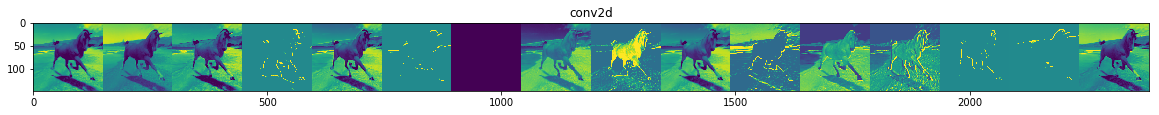

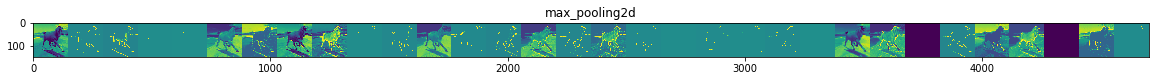

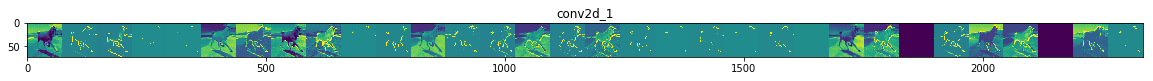

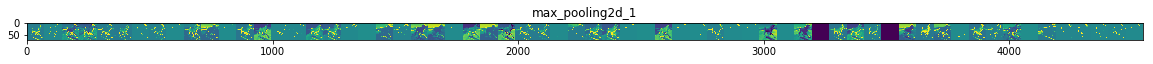

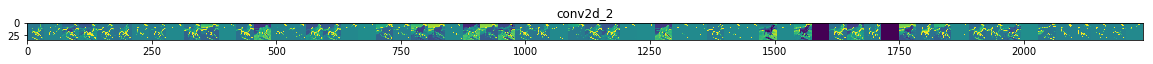

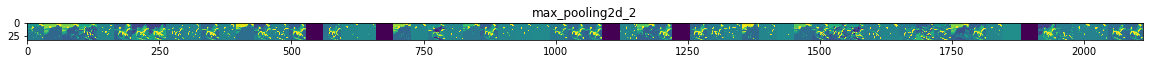

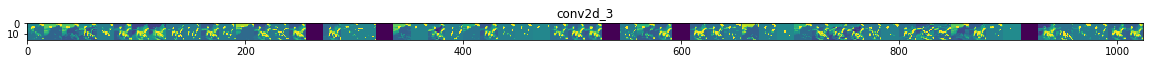

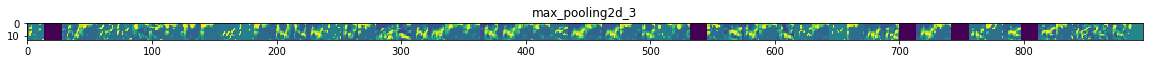

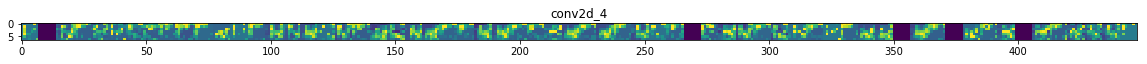

In [16]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array,load_img

# let's define a new model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after the first

successive_outputs = [layer.output for layer in model.layers[1:]]
# visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# let's prepare a random input image from the training set
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300,300)) # this is PIL image
x = img_to_array(img) # numpy array with shape (150,150,,3)
x = x.reshape((1,) + x.shape) #numpy array with shape(1,150,150,3)

# rescale by 1/255
x /= 255

# let's run our image through our network, thus obtaining all intermediate representations for this image
successive_feature_maps = visualization_model.predict(x)

# these are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

as you can see we go from the raw pixels of the images to increasingly abstract and compact representations. The representations downstream start highlighting what the network pays attention to, and they show fewer and fewer features being "activated"; most are set to zero. This is called "sparsity." Representation sparsity is a key feature of deep learning.

These representations carry increasingly less information about the original pixels of the image, but increasingly refined information about the class of the image. You can think of a convnet (or a deep network in general) as an information distillation pipeline.

Before running the next exercise, run the following cell to terminate the kernel and free memory resources:

In [0]:
import os,signal
os.kill(os.getpid(), signal.SIGKILL)